In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, neighbors
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from collections import Counter
from matplotlib.colors import ListedColormap

In [2]:
df = pd.read_csv("/home/shri/Documents/iris.csv")
df.head(4)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa


In [3]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
df['label_variety']= label_encoder.fit_transform(df['variety']) 
  
df['label_variety'].unique() 

array([0, 1, 2])

In [4]:
# creating Matrix 'x' and target vector 'y'

# this is total data framei.e converting df to numpy array
x = np.array(df[["sepal.length","sepal.width","petal.length","petal.width"]])

# this is only class labels of data
y = np.array(df['label_variety'])


In [5]:
#splitting the train and test data

x_1, x_test, y_1, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

#splitting the train data into 2 parts CrossValidation_Train and CrossValidation_test

x_tr, x_cv, y_tr, y_cv =train_test_split(x_1, y_1, test_size=0.3)



In [6]:
for i in range(1,30,2):
    # k = 1,3,5,7,...29
    knn = KNeighborsClassifier(n_neighbors=i)
    
    # fit the modelon CV Train
    knn.fit(x_tr, y_tr)
    
    #Taking Cv data and passing it to the trained data to predict
    pred = knn.predict(x_cv)
    
    # Evaluating CV accuracy i.e Model Accuracy
    # y_cv is actual label and pred is predicted label
    acc = accuracy_score(y_cv, pred, normalize=True) * float(100)
    print('\n CV Accuracy for k = %d is %d %%' %(i,acc))





 CV Accuracy for k = 1 is 90 %

 CV Accuracy for k = 3 is 96 %

 CV Accuracy for k = 5 is 93 %

 CV Accuracy for k = 7 is 96 %

 CV Accuracy for k = 9 is 100 %

 CV Accuracy for k = 11 is 96 %

 CV Accuracy for k = 13 is 96 %

 CV Accuracy for k = 15 is 90 %

 CV Accuracy for k = 17 is 90 %

 CV Accuracy for k = 19 is 90 %

 CV Accuracy for k = 21 is 90 %

 CV Accuracy for k = 23 is 87 %

 CV Accuracy for k = 25 is 90 %

 CV Accuracy for k = 27 is 87 %

 CV Accuracy for k = 29 is 84 %


In [7]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_tr,y_tr)

pred = knn.predict(x_test)

acc = accuracy_score(y_test, pred, normalize=True )*float(100)

print('Test Accuracy for k=5 is %d %%' %(acc))

Test Accuracy for k=5 is 95 %



The optimal number of neighbors is 7.


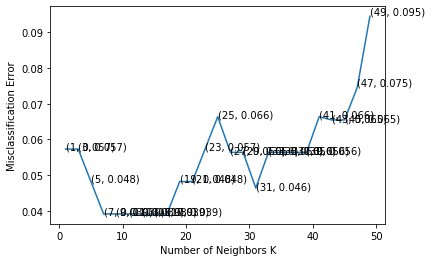

the misclassification error for each k value is :  [0.057 0.057 0.048 0.039 0.039 0.039 0.039 0.039 0.039 0.048 0.048 0.057
 0.066 0.056 0.056 0.046 0.056 0.056 0.056 0.056 0.066 0.065 0.065 0.075
 0.095]
*********************************************************************
optimal k value is:  7


In [8]:
#creating odd list of vals for 'k'

li = list(range(0,50))
neighbors = list(filter(lambda x: x%2 != 0,li))

#empty list to hold CV scores/accuracy
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_1, y_1, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)

# plot misclassification error vs k 
plt.plot(neighbors, MSE)

for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each k value is : ", np.round(MSE,3))
print('*********************************************************************')
print("optimal k value is: ",optimal_k)

In [9]:
# ============================== KNN with k = optimal_k ===============================================
# instantiate learning model k = optimal_k
knn_optimal = KNeighborsClassifier(n_neighbors=7)

# fitting the model
knn_optimal.fit(x_1, y_1)

# predict the response
pred = knn_optimal.predict(x_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))


The accuracy of the knn classifier for k = 7 is 97.777778%
